<a href="https://colab.research.google.com/github/sangamithraD/Breast_Cancer_Detection_Python-AIML/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving data.csv to data (1).csv
Shape of dataset: (569, 33)

Columns:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

First 5 rows:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903

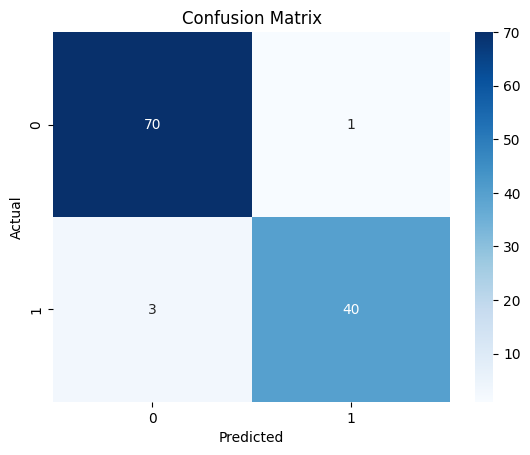

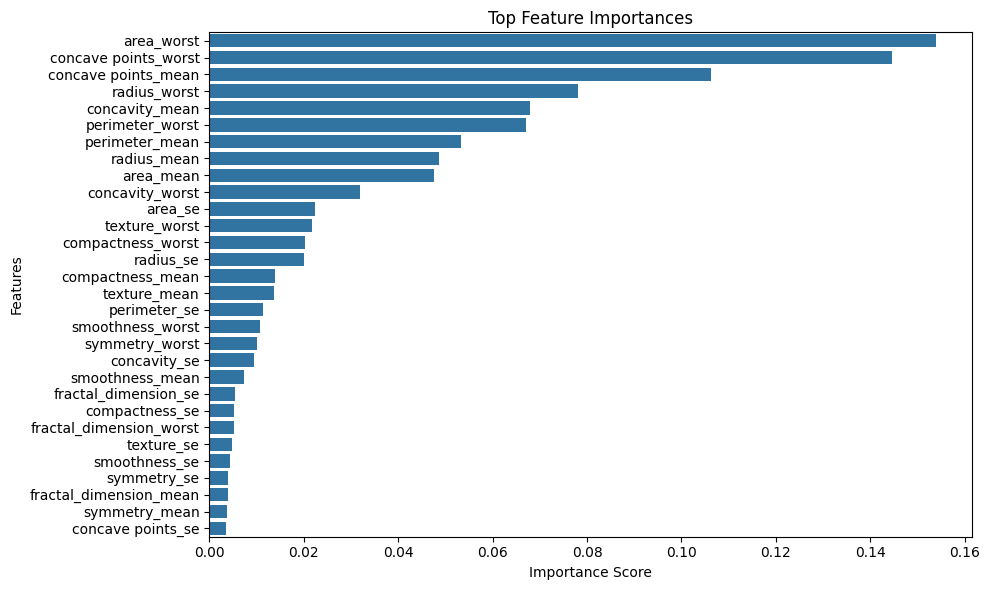

In [ ]:
# Breast Cancer Detection using Random Forest

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load Dataset
# Upload 'Breast_cancer_data.csv' from Google Drive or your local system
from google.colab import files
uploaded = files.upload()

# Step 3: Read CSV
df = pd.read_csv('data.csv')

# Step 4: Data Overview
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())

# Step 5: Preprocessing
# Drop unneeded columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Encode Diagnosis column: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 6: Split Features and Target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Prediction
y_pred = model.predict(X_test)

# Step 10: Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy of Model:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: Feature Importance Plot
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()